**CP 3.1** In the on-line resources3 you will find a file called sunspots.txt, which contains the
observed number of sunspots on the Sun for each month since January 1749. The file
contains two columns of numbers, the first being the month and the second being the
sunspot number. 
a) Write a program that reads in the data and makes a graph of sunspots as a function of time. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sunspots_data = np.loadtxt("sunspots.txt")


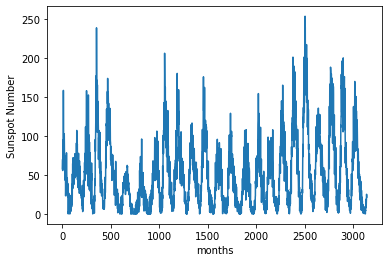

In [3]:
x = []
y = []
for pt in sunspots_data:
    x.append(pt[0])
    y.append(pt[1])
plt.plot(x, y)
plt.xlabel('months')
plt.ylabel('Sunspot Number')
plt.show()
    

b) Modify your program to display only the first 1000 data points on the graph.

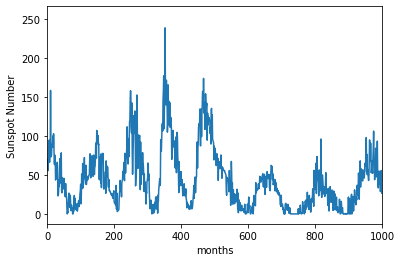

In [4]:
plt.plot(x, y)
plt.xlim(left = 0, right = 1000)
plt.xlabel('months')
plt.ylabel('Sunspot Number')
plt.show()

c) Modify your program further to calculate and plot the running average of the
data, defined by
$$Y_k = \frac{1}{2r} \sum_{m=-r}^{r} y_{k+m},$$
where $r = 5$ in this case (and the yk are the sunspot numbers). Have the program
plot both the original data and the running average on the same graph, again
over the range covered by the first 1000 data points.


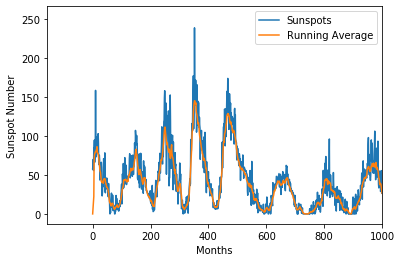

In [6]:
def running_average(y, r):
    '''calculate running average as defined in the problem statement'''
    Y_k = []
    for i in range(len(y)):
        temp = 0
        if i < r:
            for j in range(i):
                temp += y[j]
            Y_k.append(temp * (1/(2*r+1)))
        elif i > len(y) - r:
            for t in range(i, len(y)):
                temp += y[t]
            Y_k.append(temp * (1/(2*r+1)))
        else:
            for k in range(i - r, i + r):
                temp += y[k]
            Y_k.append(temp * (1/(2*r+1)))
    return Y_k
Y_k = running_average(y, 5)
plt.plot(x, y)
plt.plot(x, Y_k)
plt.xlim(right = 1000)
plt.ylabel('Sunspot Number')
plt.xlabel('Months')
plt.legend(['Sunspots','Running Average'])
plt.show()
                
            
        

**CP 3.2: Curve plotting**
Although the plot function is designed primarily for plotting standard xy graphs, it
can be adapted for other kinds of plotting as well.



a) Make a plot of the so-called deltoid curve, which is defined parametrically by the
equations
$$x = 2 \cos \theta + \cos 2\theta, y = 2\sin \theta - \sin 2\theta,$$
where $\theta \leq \theta < 2 \pi$. Take a set of values of $\theta$ between zero and $2\pi$ and calculate $x$
and $y$ for each from the equations above, then plot $y$ as a function of $x$.

In [17]:
from math import pi, cos, sin, exp

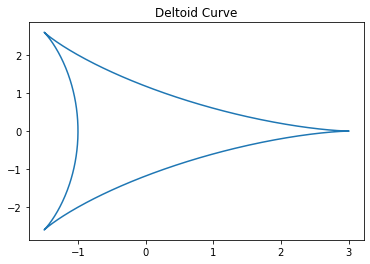

In [21]:
x_vals = [2 * cos(theta) + cos(2 * theta) for theta in np.arange(0, 2 * pi, .01)]
y_vals = [2 * sin(theta) - sin(2 * theta) for theta in np.arange(0, 2 * pi, .01)]
plt.plot(x_vals, y_vals)
plt.title('Deltoid Curve')
plt.show()

b) Taking this approach a step further, one can make a polar plot $r = f(\theta)$ for some
function $f$ by calculating $r$ for a range of values of $\theta$ and then converting $r$ and
$\theta$ to Cartesian coordinates using the standard equations $x = r \cos \theta, y = r \sin \theta$.
Use this method to make a plot of the Galilean spiral $r = \theta^2$
for $0 \leq \theta \leq 10 \pi$.

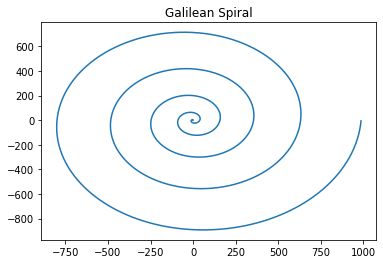

In [26]:
x_vals = []
y_vals = []
for theta in np.arange(0, 10 * pi, .01):
    r = theta**2
    x_vals.append(r * cos(theta))
    y_vals.append(r * sin(theta))
plt.plot(x_vals, y_vals)
plt.title('Galilean Spiral')
plt.show()

c) Using the same method, make a polar plot of “Fey’s function”
$$r = e^{\cos \theta} - 2 \cos 4 \theta + \sin^5 \frac{\theta}{12}$$
in the range $0 \leq \theta \leq 24 \pi$.

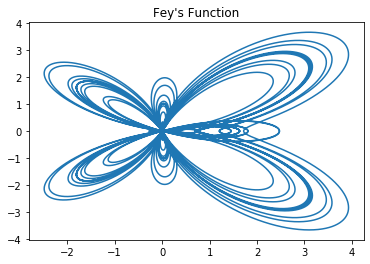

In [30]:
x = []
y = []
for theta in np.arange(0, 24 * pi, .001):
    r = exp(cos(theta)) - 2 * cos(4 * theta) + sin(theta / 12)**5
    x.append(r * cos(theta))
    y.append(r * sin(theta))
plt.plot(x, y)
plt.title("Fey's Function")
plt.show()

**CP 3.8: Least-squares fitting and the photoelectric effect**

a) In the on-line resources you will find a file called millikan.txt. The file contains
two columns of numbers, giving the $x$ and $y$ coordinates of a set of data points.
Write a program to read these data points and make a graph with one dot or circle
for each point.


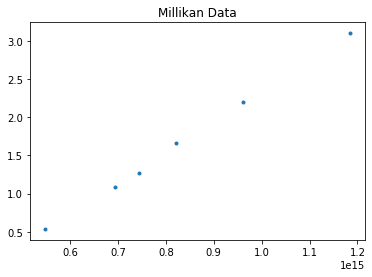

In [7]:
millikan_data = np.loadtxt('millikan.txt')
x_vals, y_vals = [], []
N = len(millikan_data)
for i in range(N):
    x_vals.append(millikan_data[i][0])
    y_vals.append(millikan_data[i][1])
plt.scatter(x_vals, y_vals, marker = '.')
plt.title('Millikan Data')


E_x = 0
E_y = 0
E_xy = 0
E_xx = 0
for i in range(N):
    temp = (x_vals[i] * y_vals[i]) / N
    temp2 = x_vals[i]**2 / N
    E_xy += temp
    E_xx += temp2
    E_x += x_vals[i] / N
    E_y += y_vals[i] / N

b) Add code to your program, before the part that makes the graph, to calculate the
quantities $E_x, E_y, E_{xx}, and \ E_{xy}$ defined above, and from them calculate and print
out the slope m and intercept c of the best-fit line.

In [9]:
m = (E_xy - E_x * E_y) / (E_xx - E_x**2)
c = (E_xx * E_y - E_x * E_xy) / (E_xx - E_x**2)
print(f'the value of m is {m} and the value of c is {c}')

the value of m is 4.088227358517518e-15 and the value of c is -1.7312358039813618


c) Now write code that goes through each of the data points in turn and evaluates
the quantity $mx_i + c$ using the values of $m$ and $c$ that you calculated. Store these
values in a new array or list, and then graph this new array, as a solid line, on the
same plot as the original data. You should end up with a plot of the data points
plus a straight line that runs through them.

Text(0.5, 1.0, 'Millikan Data')

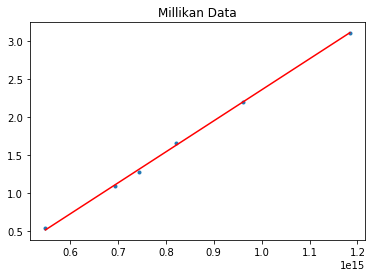

In [10]:
best_fit_line = [m*x+c for x in x_vals]
plt.scatter(x_vals, y_vals, marker = '.')
plt.plot(x_vals, best_fit_line, color = 'red')
plt.title('Millikan Data')

d) The data in the file millikan.txt are taken from a historic experiment by Robert
Millikan that measured the photoelectric effect. When light of an appropriate wavelength is shone on the surface of a metal, the photons in the light can strike conduction electrons in the metal and, sometimes, eject them from the surface into the
free space above. The energy of an ejected electron is equal to the energy of the
photon that struck it minus a small amount $\phi$ called the work function of the surface, which represents the energy needed to remove an electron from the surface.
The energy of a photon is $hν$, where $h$ is Planck’s constant and $ν$ is the frequency
of the light, and we can measure the energy of an ejected electron by measuring
the voltage $V$ that is just sufficient to stop the electron moving. Then the voltage,
frequency, and work function are related by the equation
$$V = \frac{h}{e}v - \phi$$,
where $e$ is the charge on the electron. This equation was first given by Albert
Einstein in 1905.
The data in the file millikan.txt represent frequencies $ν$ in hertz (first column)
and voltages $V$ in volts (second column) from photoelectric measurements of this
kind. Using the equation above and the program you wrote, and given that the
charge on the electron is $1.602 \times 10^{−19}$ C, calculate from Millikan’s experimental data a value for Planck’s constant. Compare your value with the accepted value
of the constant, which you can find in books or on-line. You should get a result
within a couple of percent of the accepted value.


In [16]:
e = 1.602 * 10**(-19)
h = m * e
h_real = 6.62607*10**(-34)
perc_off = abs(h_real - h) / h_real * 100
print(f'My value for Plancks constant is {h} which is {perc_off:4.2f} percent off the real value')

My value for Plancks constant is 6.549340228345063e-34 which is 1.16 percent off the real value


**CP 4.4: Calculating integrals**
Suppose we want to calculate the value of the integral 
$$I = \int_{-1}^{1} \sqrt{1 - x^2} dx$$
The integrand looks like a semicircle of radius 1 and hence the value of the integral—the area under the curve—must be equal to $\frac{1}{2} \pi = 1.57079632679 \dots$
Alternatively, we can evaluate the integral on the computer by dividing the domain
of integration into a large number $N$ of slices of width $h = 2/N$ each and then using
the Riemann definition of the integral:
$$I = \lim_N \rightarrow \infty \sum_{k=1}^N h y_k$$,
where $$y_k = \sqrt{1 - x_k^2} \ and \ x_k = -1 + hk$$
We cannot in practice take the limit $N \rightarrow \infty$, but we can make a reasonable approximation by just making $N$ large

a) Write a program to evaluate the integral above with $N = 100$ and compare the
result with the exact value. The two will not agree very well, because $N = 100$ is
not a sufficiently large number of slices

In [19]:
def Riemann_sum(N):
    '''calculate the Integral in the problem using the Riemann definition and a deterimined value of slices, N'''
    h = 2 / N
    integral_val = 0
    for k in range(N):
        x_k = -1 + h * k
        y_k = (1 - x_k**2)**0.5
        integral_val += h * y_k
    return integral_val
perc = abs(Riemann_sum(100) - 0.5 * pi) / (0.5 * pi) * 100
print(f'The calculated result is {Riemann_sum(100):4.2} which is {perc:4.2f} percent off of the real value')


The calculated result is  1.6 which is 0.11 percent off of the real value


b) Increase the value of N to get a more accurate value for the integral. If we require
that the program runs in about one second or less, how accurate a value can you
get?


In [21]:
%%time
print(f'Requiring the function to run in roughly 1 second, we can obtain a value of {Riemann_sum(1200000)}')

Requiring the function to run in roughly 1 second, we can obtain a value of 1.5707963255297908
Wall time: 1.66 s


**CP 5.1:**
In the on-line resources you will find a file called velocities.txt, which
contains two columns of numbers, the first representing time t in seconds and the second the x-velocity in meters per second of a particle, measured once every second from
time t = 0 to t = 100. Write a program to do the following:

a) Read in the data and, using the trapezoidal rule, calculate from them the approximate distance traveled by the particle in the x direction as a function of time. See
Section 2.4.3 on page 57 if you want a reminder of how to read data from a file.

In [22]:
velocities_data = np.loadtxt("velocities.txt")
a = int(velocities_data[0][0])
b = int(velocities_data[-1][0])
N = b
h = (b - a) // N
y_integrated = []
ans = 0.5 * velocities_data[a][1] + 0.5 *velocities_data[b][1]
tot_distance = abs(0.5 * velocities_data[a][1] + 0.5 *velocities_data[b][1])
for i in range(1, N):
    index = (a + i * h)
    ans += velocities_data[index][1]
    tot_distance += abs(velocities_data[index][1])
    y_integrated.append(tot_distance)
print(f'The approximate distance traveled by the particle is {ans:4.4f}')

the approximate distance traveled by the particle is 8.2189


b) Extend your program to make a graph that shows, on the same plot, both the
original velocity curve and the distance traveled as a function of time.

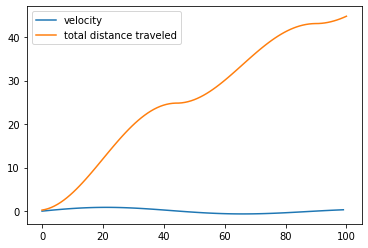

In [23]:
x = []
y = []
for i in range(int(velocities_data[-1][0])):
    x.append(velocities_data[i][0])
    y.append(velocities_data[i][1])
plt.plot(x, y)
plt.plot(np.linspace(0, b, N-1), y_integrated)
plt.legend(['velocity', 'total distance traveled'])

**CP 5.2**

a) Write a program to calculate an approximate value for the integral $\int_0^2 x^4 - 2x + 1 dx$ from Example 5.1, but using Simpson’s rule with 10 slices instead of the
trapezoidal rule. You may wish to base your program on the trapezoidal rule
program on page 142

b) Run the program and compare your result to the known correct value of $4.4$.
What is the fractional error on your calculation?


In [26]:
def f(x):
    '''return value of desired function at x'''
    return (x**4 - 2 * x + 1)
N = 10
a = 0.0
b = 2.0 
def simpsons_rule(f, a, b, N):
    h = (b - a) / N
    sum1 = 0
    sum2 = 0
    for i in range(1, N // 2 + 1):
        sum1 += f(a + (2 * i - 1) * h)
    sum1 *= 4
    for j in range(1, N // 2):
        sum2 += f(a + 2 * j * h)
    sum2 *= 2
    return ((h / 3) * (f(a) + f(b) + sum1 + sum2))
print(f'The value calculated is {simpsons_rule(f, a, b, N)}')
est = simpsons_rule(f, a, b, N)
frac_error = (abs(est - 4.4)) / 4.4 * 100
print (f'the value is {frac_error:4.6f} percent off of the correct value')

The value calculated is 4.400426666666667
the value is 0.009697 percent off of the correct value


c) Modify the program to use a hundred slices instead, then a thousand. Note the
improvement in the result. How do the results compare with those from Example 5.1 for the trapezoidal rule with the same numbers of slices?

In [29]:
trap_rule_val_100 = 4.40107
trap_rule_val_1000 = 4.40001
perc1 = abs(simpsons_rule(f, a, b, 100) - trap_rule_val_100) / trap_rule_val_100 * 100
perc2 = abs(simpsons_rule(f, a, b, 1000) - trap_rule_val_1000) / trap_rule_val_1000 * 100
print(f'The value for 100 slices is {simpsons_rule(f, a, b, 100)} which is {perc1:4.4f} percent different than the trapezoidal rule with 100 slices. Simpsons rule is more accurate.')
print(f'The value for 1000 slices is {simpsons_rule(f, a, b, 1000)} which is {perc2:4.5f} percent different than the trapezoidal rule with 1000 slices. Simpsons rule is more accurate.')

The value for 100 slices is 4.400000042666668 which is 0.0243 percent different than the trapezoidal rule with 100 slices. Simpsons rule is more accurate.
The value for 1000 slices is 4.400000000004267 which is 0.00023 percent different than the trapezoidal rule with 1000 slices. Simpsons rule is more accurate.
